# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "Iris"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData005 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.005)
AnalyzedData007 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.007)
AnalyzedData009 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.009)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)
AnalyzedData013 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.013)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData017 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.017)
AnalyzedData019 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.019)
AnalyzedData021 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.021)
AnalyzedData023 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.023)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
AnalyzedData027 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.027)
AnalyzedData029 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.029)
AnalyzedData031 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.031)
AnalyzedData033 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.033)
AnalyzedData035 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.035)
AnalyzedData037 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.037)
AnalyzedData039 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.039)
# AnalyzedData041 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.041)
# AnalyzedData043 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.043)
# AnalyzedData045 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.045)


# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData005["Error_DUREAL"].shape[0],
                        AnalyzedData007["Error_DUREAL"].shape[0],
                        AnalyzedData009["Error_DUREAL"].shape[0],
                        AnalyzedData011["Error_DUREAL"].shape[0],
                        AnalyzedData013["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData017["Error_DUREAL"].shape[0],
                        AnalyzedData019["Error_DUREAL"].shape[0],
                        AnalyzedData021["Error_DUREAL"].shape[0],
                        AnalyzedData023["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0], 
                        AnalyzedData027["Error_DUREAL"].shape[0], 
                        AnalyzedData029["Error_DUREAL"].shape[0], 
                        AnalyzedData031["Error_DUREAL"].shape[0], 
                        AnalyzedData033["Error_DUREAL"].shape[0], 
                        AnalyzedData035["Error_DUREAL"].shape[0],
                        AnalyzedData037["Error_DUREAL"].shape[0],
                        AnalyzedData039["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData005["Error_UNREAL"].shape[0],
                         AnalyzedData007["Error_UNREAL"].shape[0],
                         AnalyzedData009["Error_UNREAL"].shape[0],
                         AnalyzedData011["Error_UNREAL"].shape[0], 
                         AnalyzedData013["Error_UNREAL"].shape[0], 
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData017["Error_UNREAL"].shape[0], 
                         AnalyzedData019["Error_UNREAL"].shape[0], 
                         AnalyzedData021["Error_UNREAL"].shape[0], 
                         AnalyzedData023["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0],
                         AnalyzedData027["Error_UNREAL"].shape[0], 
                         AnalyzedData029["Error_UNREAL"].shape[0], 
                         AnalyzedData031["Error_UNREAL"].shape[0], 
                         AnalyzedData033["Error_UNREAL"].shape[0], 
                         AnalyzedData035["Error_UNREAL"].shape[0],
                         AnalyzedData037["Error_UNREAL"].shape[0],
                         AnalyzedData039["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(5,41,2)
ShapeTable

,DUREAL,UNREAL
5,100,100
7,100,100
9,100,100
11,100,100
13,100,100
15,100,100
17,100,100
19,100,100
21,100,100
23,100,100


# Run Time

In [4]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
print("DUREAL 0.039 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData039["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData039["Time_DUREAL"])/60,2)))
print("UNREAL 0.039 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData039["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData039["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 0.35| Max: 0.41
DUREAL 0.015 Time (minutes): Mean: 0.39| Max: 1.3
UNREAL 0.015 Time (minutes): Mean: 0.38| Max: 1.22
DUREAL 0.039 Time (minutes): Mean: 31.96| Max: 122.9
UNREAL 0.039 Time (minutes): Mean: 31.91| Max: 122.18


# Error Vec

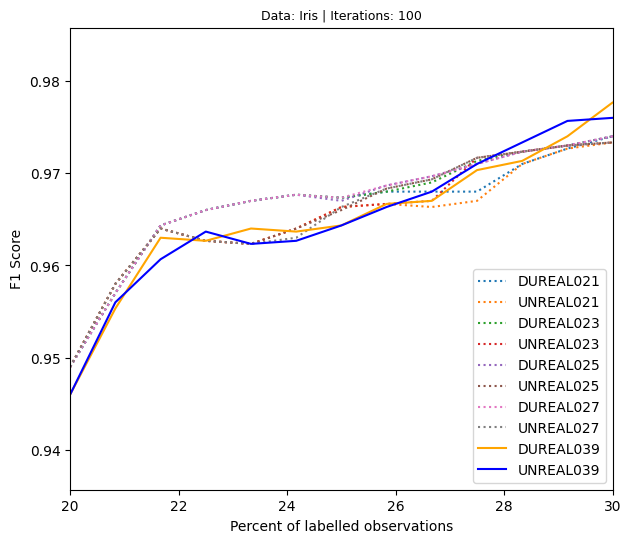

In [29]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL039": "orange",
    "UNREAL039": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL005": "solid",
    "UNREAL005": "solid",
    "DUREAL039": "solid",
    "UNREAL039": "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  RandomForest = RandomForesResults["Error_RF"],
                #  DUREAL005 = AnalyzedData005["Error_DUREAL"],
                #  UNREAL005 = AnalyzedData005["Error_UNREAL"],
                #  DUREAL007 = AnalyzedData007["Error_DUREAL"],
                #  UNREAL007 = AnalyzedData007["Error_UNREAL"],
                #  DUREAL009 = AnalyzedData009["Error_DUREAL"],
                #  UNREAL009 = AnalyzedData009["Error_UNREAL"],
                #  DUREAL011 = AnalyzedData011["Error_DUREAL"],
                #  UNREAL011 = AnalyzedData011["Error_UNREAL"],
                #  DUREAL013 = AnalyzedData013["Error_DUREAL"],
                #  UNREAL013 = AnalyzedData013["Error_UNREAL"],
                #  DUREAL015 = AnalyzedData015["Error_DUREAL"],
                #  UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL017 = AnalyzedData017["Error_DUREAL"],
                #  UNREAL017 = AnalyzedData017["Error_UNREAL"],
                #  DUREAL019 = AnalyzedData019["Error_DUREAL"],
                #  UNREAL019 = AnalyzedData019["Error_UNREAL"],
                 DUREAL021 = AnalyzedData021["Error_DUREAL"],    # Better than 39
                 UNREAL021 = AnalyzedData021["Error_UNREAL"],    # Better than 39
                 DUREAL023 = AnalyzedData023["Error_DUREAL"],    # Better than 39
                 UNREAL023 = AnalyzedData023["Error_UNREAL"],    # Better than 39
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],    # Better than 39
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],    # Better than 39
                 DUREAL027 = AnalyzedData027["Error_DUREAL"],    # Better than 39
                 UNREAL027 = AnalyzedData027["Error_UNREAL"],    # Better than 39
                #  DUREAL029 = AnalyzedData029["Error_DUREAL"],
                #  UNREAL029 = AnalyzedData029["Error_UNREAL"],
                #  DUREAL031 = AnalyzedData031["Error_DUREAL"],
                #  UNREAL031 = AnalyzedData031["Error_UNREAL"],
                #  DUREAL033 = AnalyzedData033["Error_DUREAL"],
                #  UNREAL033 = AnalyzedData033["Error_UNREAL"],
                #  DUREAL035 = AnalyzedData033["Error_DUREAL"],
                #  UNREAL035 = AnalyzedData035["Error_UNREAL"],
                #  DUREAL037 = AnalyzedData037["Error_DUREAL"],
                #  UNREAL037 = AnalyzedData037["Error_UNREAL"],
                 DUREAL039 = AnalyzedData039["Error_DUREAL"],
                 UNREAL039 = AnalyzedData039["Error_UNREAL"],
                ##  DUREAL041 = AnalyzedData041["Error_DUREAL"],
                ##  UNREAL041 = AnalyzedData041["Error_UNREAL"],
                ##  DUREAL043 = AnalyzedData043["Error_DUREAL"],
                ##  UNREAL043 = AnalyzedData043["Error_UNREAL"],
                ##  DUREAL045 = AnalyzedData045["Error_DUREAL"],
                ##  UNREAL045 = AnalyzedData045["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                xlim = [20,30],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

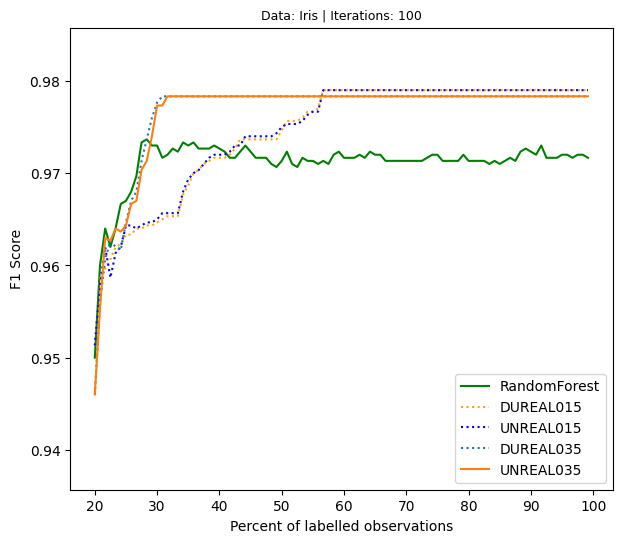

In [6]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL0Large": "orange",
    "UNREAL0Large": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL005": "solid",
    "UNREAL005": "solid",
    "DUREAL0Large": "solid",
    "UNREAL035": "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL035 = AnalyzedData035["Error_DUREAL"],
                 UNREAL035 = AnalyzedData035["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Selection History

In [7]:
# SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
# SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
# SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)
# SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

# Tree Counts

## Set Up

In [8]:
AnalyzedDataSmall = AnalyzedData035
AnalyzedDataLarge = AnalyzedData039

In [9]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

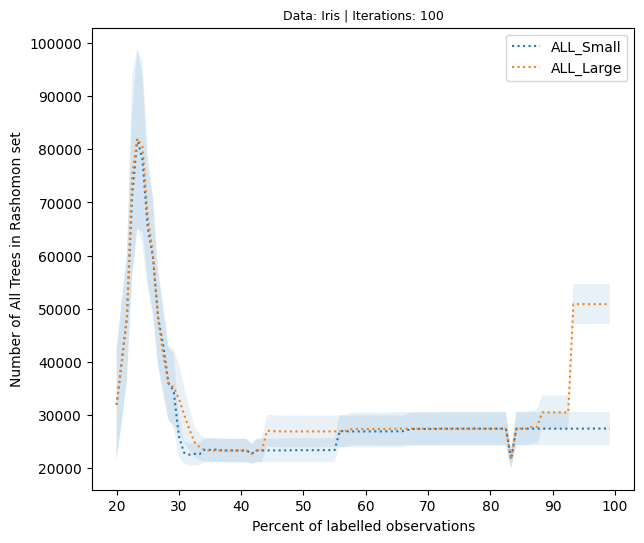

In [10]:
TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                 ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                #  Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                 ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)

## Number of Unique Trees

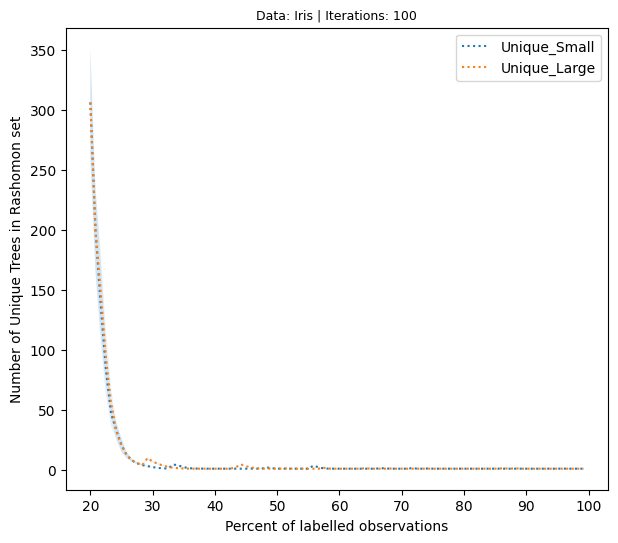

In [11]:
TreePlot = MeanVariancePlot(RelativeError = None,
                 Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                 Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)